#### Ollama
Ollama supports embedding models, making it possible to build retrieval augmented generation (RAG) applications that combine text prompts with existing documents or other data.

In [1]:
from langchain_community.embeddings import OllamaEmbeddings

In [2]:
embeddings=(
    OllamaEmbeddings(model="gemma:2b")  ##by default it ues llama2
)


C:\Users\asifp\AppData\Local\Temp\ipykernel_13548\2698109886.py:2: LangChainDeprecationWarning: The class `OllamaEmbeddings` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaEmbeddings``.
  OllamaEmbeddings(model="gemma:2b")  ##by default it ues llama2


In [5]:
embeddings

OllamaEmbeddings(base_url='http://localhost:11434', model='gemma:2b', embed_instruction='passage: ', query_instruction='query: ', mirostat=None, mirostat_eta=None, mirostat_tau=None, num_ctx=None, num_gpu=None, num_thread=None, repeat_last_n=None, repeat_penalty=None, temperature=None, stop=None, tfs_z=None, top_k=None, top_p=None, show_progress=False, headers=None, model_kwargs=None)

In [25]:
r1=embeddings.embed_documents(
    [
       "I love you",
       "You are my love", 
       "A is the engllish alphabet",
    ]
)

In [26]:
import numpy as np
print(np.array(r1).shape)
len(r1[0])

(3, 1024)


1024

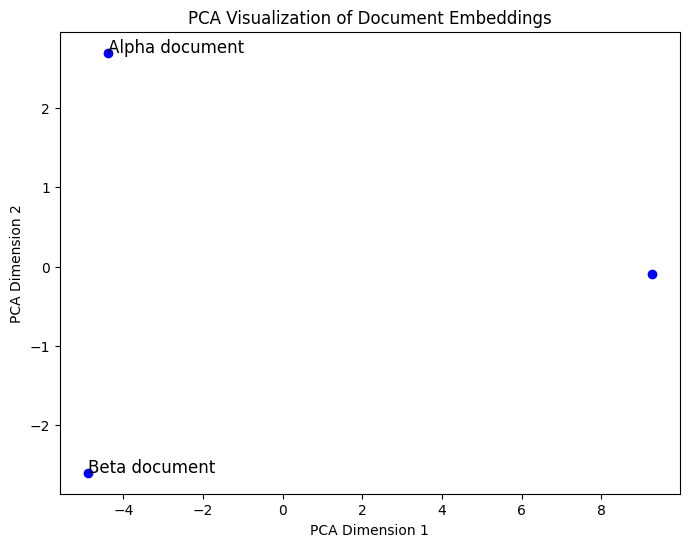

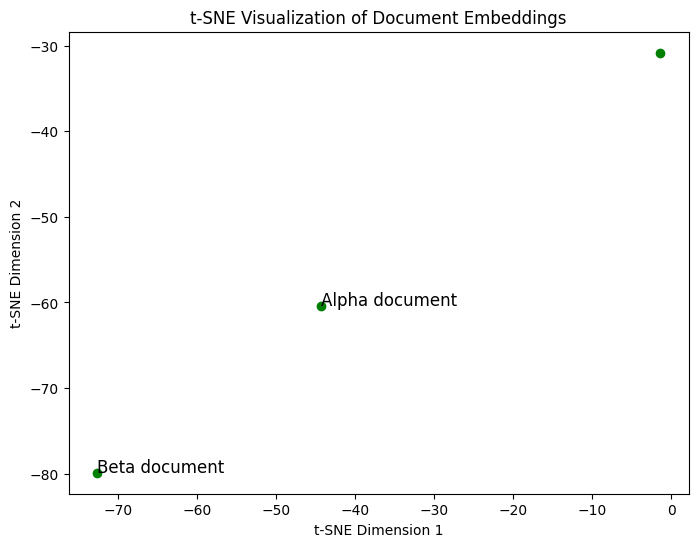

In [31]:
## let see how each document relates to each other visually.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Assume r1 is a list of vectors
r1 = np.array(r1)

# Step 1: Reduce dimensionality (choose one of the methods)
# Using PCA
pca = PCA(n_components=2)
reduced_vectors_pca = pca.fit_transform(r1)

# Using t-SNE
tsne = TSNE(n_components=2, perplexity=1, random_state=42)
reduced_vectors_tsne = tsne.fit_transform(r1)

# Step 2: Visualize the reduced vectors
# (PCA visualization)
plt.figure(figsize=(8, 6))
plt.scatter(reduced_vectors_pca[:, 0], reduced_vectors_pca[:, 1], color='blue')
for i, text in enumerate(["Alpha document", "Beta document"]):  # Add labels
    plt.text(reduced_vectors_pca[i, 0], reduced_vectors_pca[i, 1], text, fontsize=12)
plt.title("PCA Visualization of Document Embeddings")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.show()

# (t-SNE visualization)
plt.figure(figsize=(8, 6))
plt.scatter(reduced_vectors_tsne[:, 0], reduced_vectors_tsne[:, 1], color='green')
for i, text in enumerate(["Alpha document", "Beta document"]):  # Add labels
    plt.text(reduced_vectors_tsne[i, 0], reduced_vectors_tsne[i, 1], text, fontsize=12)
plt.title("t-SNE Visualization of Document Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


In [15]:
r1[0]

[-2.6347339153289795,
 -0.8978329300880432,
 0.20013652741909027,
 2.618105411529541,
 -0.35633331537246704,
 0.8703628182411194,
 -0.04864676296710968,
 0.10576695203781128,
 0.8424978256225586,
 -1.4359900951385498,
 0.8230496048927307,
 0.7397993206977844,
 0.633092999458313,
 -0.6372444033622742,
 -0.7627824544906616,
 0.004896192345768213,
 2.929640293121338,
 -0.8842480182647705,
 0.8413521647453308,
 0.2321000099182129,
 0.20580267906188965,
 -0.27474749088287354,
 0.8416287899017334,
 0.35556668043136597,
 -0.6759063005447388,
 -1.058213710784912,
 -0.6904208660125732,
 0.047480013221502304,
 0.1865379363298416,
 1.2944424152374268,
 -0.15693774819374084,
 -0.07263007760047913,
 0.8639136552810669,
 0.4198402762413025,
 -1.6911487579345703,
 -0.06016569957137108,
 -0.9589942097663879,
 0.41848620772361755,
 0.8255683779716492,
 0.07887757569551468,
 1.6224321126937866,
 0.7385095953941345,
 1.5462100505828857,
 -0.21708299219608307,
 -0.0889224037528038,
 -1.8978663682937622,
 

In [16]:
embeddings.embed_query("What is the second letter of Greek alphabet ")

[-2.159590005874634,
 0.3066037893295288,
 -2.8743326663970947,
 0.08934115618467331,
 -0.23487348854541779,
 0.5604979991912842,
 -0.919442355632782,
 -0.8294075131416321,
 -1.4867563247680664,
 -2.095165491104126,
 -1.431664228439331,
 1.0111154317855835,
 0.6857923865318298,
 -0.3311399519443512,
 -0.7673187851905823,
 1.1204487085342407,
 2.075923442840576,
 -1.3238552808761597,
 -0.38615307211875916,
 -0.4941830635070801,
 0.4544341266155243,
 -1.5665701627731323,
 2.588852882385254,
 0.38532736897468567,
 -1.9619910717010498,
 -0.6937251687049866,
 0.7375189661979675,
 -0.1726505160331726,
 -1.2364801168441772,
 0.23227334022521973,
 -3.1776740550994873,
 0.7580391764640808,
 0.7968155145645142,
 0.8328441977500916,
 -0.952572762966156,
 -0.6580949425697327,
 -1.5193240642547607,
 0.5352108478546143,
 1.34267258644104,
 -0.35004884004592896,
 -0.5560057163238525,
 1.6722345352172852,
 -0.9034217596054077,
 -2.0222103595733643,
 -1.4277191162109375,
 -0.37989214062690735,
 1.11598

In [29]:
### Other Embedding Models
### https://ollama.com/blog/embedding-models
embeddings = OllamaEmbeddings(model="mxbai-embed-large")
text = "This is a test document."
query_result = embeddings.embed_query(text)
query_result


[0.2974812984466553,
 -0.32101431488990784,
 0.7341828346252441,
 0.3223157525062561,
 -0.6032088398933411,
 0.18856827914714813,
 -0.07275968790054321,
 0.026741545647382736,
 0.5938283801078796,
 0.8594970107078552,
 0.008889693766832352,
 0.381898432970047,
 0.3600805401802063,
 0.01556326076388359,
 -0.6725448966026306,
 0.02658262476325035,
 -0.4427657425403595,
 0.6044663190841675,
 -0.27328747510910034,
 -0.5467050671577454,
 -0.7851458191871643,
 0.5315127968788147,
 -1.3986060619354248,
 0.21909469366073608,
 -0.2635151445865631,
 0.1862122118473053,
 -0.6210068464279175,
 -0.27603378891944885,
 1.071916937828064,
 0.8754670023918152,
 -0.294788122177124,
 0.473821759223938,
 -0.6621879935264587,
 -0.4864920675754547,
 0.43019604682922363,
 -0.7669709920883179,
 1.0449191331863403,
 -0.6972233653068542,
 -0.07103074342012405,
 -0.7155054211616516,
 -0.05568287521600723,
 0.3471437990665436,
 0.6236262917518616,
 -0.926219642162323,
 -1.3114488124847412,
 -0.2421846091747284,
 

In [30]:
len(query_result)

1024